In [1]:
import pandas as pd


# Import data from GitHub
data = pd.read_csv('/content/18_march.csv')

Get questions

In [2]:
k=data.columns
print(k)

Index(['Timestamp', 'What is your gender?', 'What is your age group?',
       'Which of these describe your position? Choose all options that apply.',
       'Are you currently in a permanent position?',
       'In which of these sector(s) do you work?', 'What is your location?',
       'Q1: How would you describe your work?  Choose all options that apply.',
       'Q2: Which of the following do you work in? Choose all options that apply.',
       'Q3: Where do bioimage analysts "sit" in your institution? Choose all options that apply. ',
       'Q4: If you work in a facility: what are the operating/business models of your facility? Choose all options that apply. Please do not answer if you do not work in a facility.',
       'Q5: If you work in a facility: how much of your budget comes from each of these? Please do not answer if you do not work in a facility. [grants you apply for]',
       'Q5: If you work in a facility: how much of your budget comes from each of these? Please do not

Select location

In [3]:
sel = data['What is your location?']
loc_data=sel.value_counts()

Correct region names

In [4]:
region_counts = data['What is your location?'].value_counts().reset_index()
region_counts.columns = ['Region', 'Count']
region_counts['Region'] = region_counts['Region'].replace('Australia/ Oceania', 'Australia/Oceania')
region_counts['Region'] = region_counts['Region'].replace('Near/ Middle East', 'Middle East')
region_counts

,Region,Count
0,Europe,176
1,North America,43
2,Australia/Oceania,11
3,Asia,10
4,Middle East,8
5,South America,7
6,Africa,6
7,Central America,1


In [5]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

df = region_counts

,Region,Count
0,Europe,176
1,North America,43
2,Australia/Oceania,11
3,Asia,10
4,Middle East,8
5,South America,7
6,Africa,6
7,Central America,1


In [6]:
# Load world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world map with the DataFrame containing counts
merged = world.set_index('continent').join(df.set_index('Region'))

<ipython-input-6-34353d59d6f7>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


## Plot simple

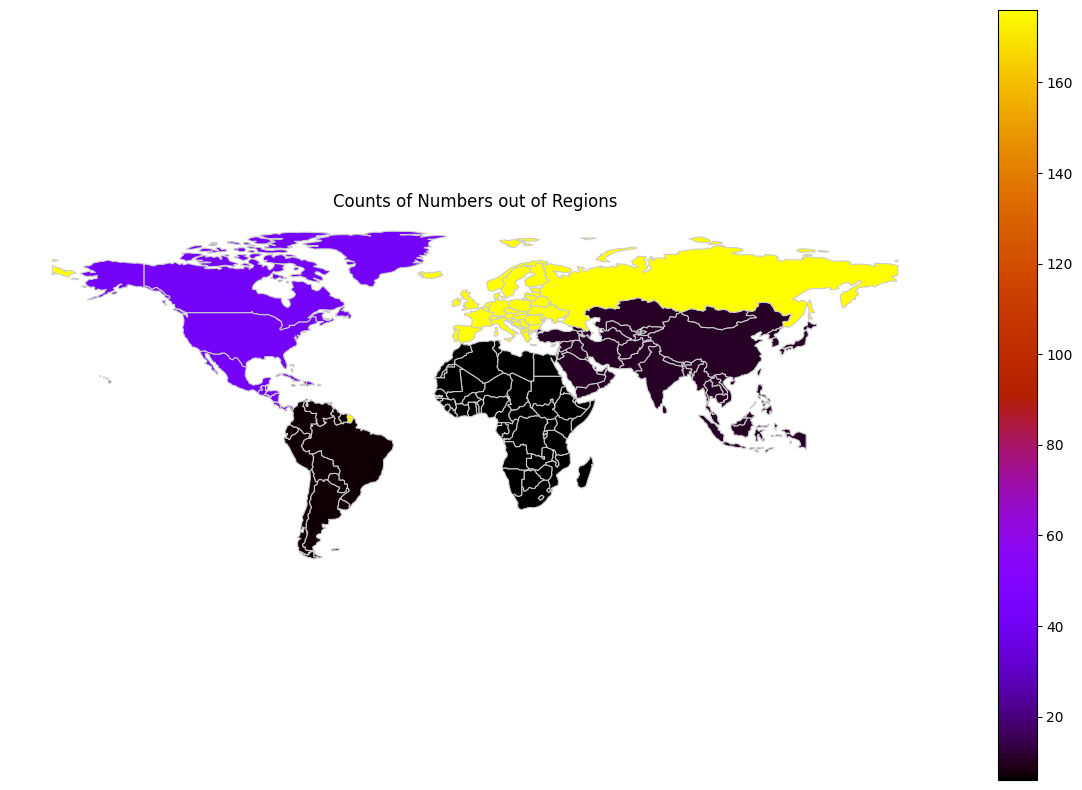

In [7]:
# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax = merged.plot(column='Count', cmap='gnuplot', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Counts of Numbers out of Regions')
ax.set_axis_off()
plt.show()

## Log scale

<ipython-input-8-3012d89155ee>:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


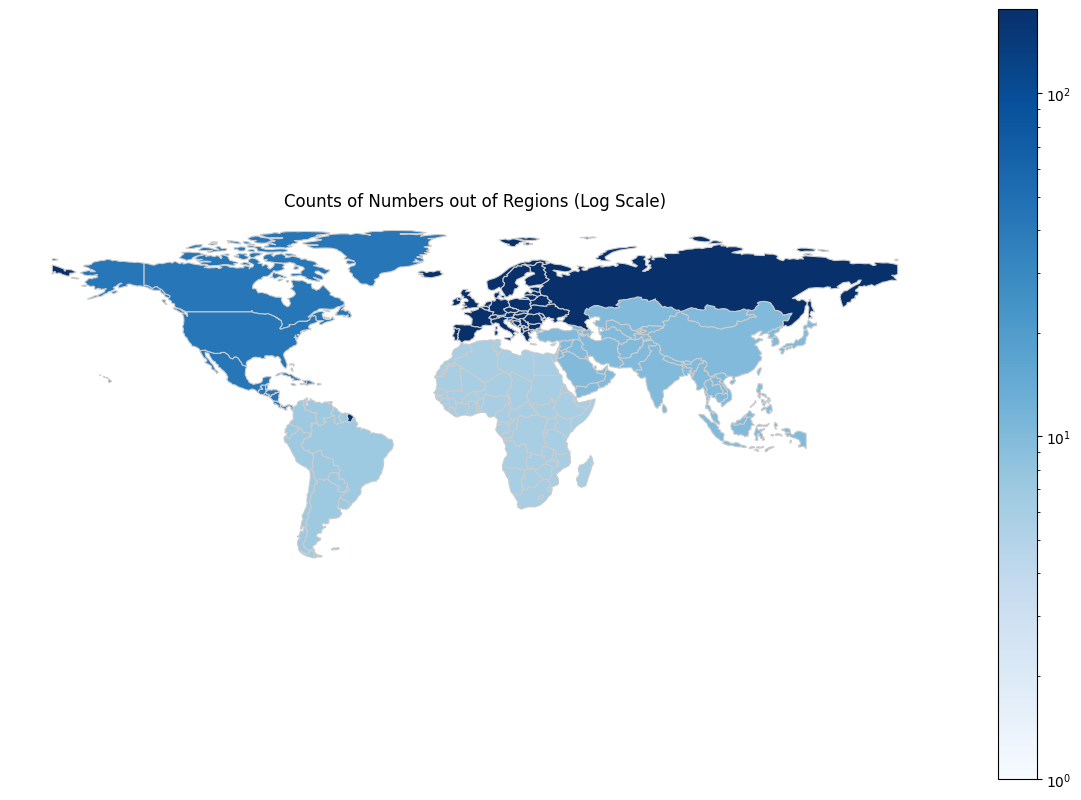

In [8]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Create a DataFrame with random counts for each region
df = region_counts

# Load world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world map with the DataFrame containing counts
merged = world.set_index('continent').join(df.set_index('Region'))

# Plot the map with log scale
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax = merged.plot(column='Count', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, norm=mcolors.LogNorm(vmin=df['Count'].min(), vmax=df['Count'].max()))
ax.set_title('Counts of Numbers out of Regions (Log Scale)')
ax.set_axis_off()
plt.show()


In [ ]:
#!pip install watermark

In [15]:
from watermark import watermark
print(watermark(packages="numpy,geopandas,matplotlib"))

numpy     : 1.25.2
geopandas : 0.13.2
matplotlib: 3.7.1

